# Importing Necessary Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

# Data Staging

In [3]:
#Loading the dataset
df = pd.read_csv('../project/data/dataset_first_50k.csv', low_memory=False)

In [4]:
def understand_data(data):
    # Print the summary information of the dataset including data types and non-null counts
    print("\nDataset Information:")
    data.info()
    # Print the first 5 rows of the dataset to give a preview of the data
    print("\nSample Data:")
    print(data.head())

In [5]:
understand_data(df)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Id            50000 non-null  int64  
 1   Experience        50000 non-null  object 
 2   Qualifications    50000 non-null  object 
 3   Salary Range      50000 non-null  object 
 4   location          50000 non-null  object 
 5   Country           50000 non-null  object 
 6   latitude          50000 non-null  float64
 7   longitude         50000 non-null  float64
 8   Work Type         50000 non-null  object 
 9   Company Size      50000 non-null  int64  
 10  Job Posting Date  50000 non-null  object 
 11  Preference        50000 non-null  object 
 12  Contact Person    50000 non-null  object 
 13  Contact           50000 non-null  object 
 14  Job Title         50000 non-null  object 
 15  Role              50000 non-null  object 
 16  Job Portal        

In [6]:
# Keep only the first 50,000 rows
df_first_50k = df.head(50000)

# Optionally, save the new dataset to a new CSV file
df_first_50k.to_csv('dataset_first_50k.csv', index=False)

# Data Cleaning

This process involves preprocessing and transforming the raw data to ensure accuracy, consistency, and usability.It includes handling missing values, correcting inconsistencies, and removing duplicates. We also standardize column names, convert categorical variables into a consistent format, and ensure that numerical data is in the correct range.
Data cleaning is essential to prepare the dataset for analysis, enabling us to extract meaningful insights from the job postings while maintaining the integrity of the data.


### First 5 Rows lookup

In [11]:
# Display the first 5 rows to understand the data structure
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [12]:
# Getting the concise summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Id            50000 non-null  int64  
 1   Experience        50000 non-null  object 
 2   Qualifications    50000 non-null  object 
 3   Salary Range      50000 non-null  object 
 4   location          50000 non-null  object 
 5   Country           50000 non-null  object 
 6   latitude          50000 non-null  float64
 7   longitude         50000 non-null  float64
 8   Work Type         50000 non-null  object 
 9   Company Size      50000 non-null  int64  
 10  Job Posting Date  50000 non-null  object 
 11  Preference        50000 non-null  object 
 12  Contact Person    50000 non-null  object 
 13  Contact           50000 non-null  object 
 14  Job Title         50000 non-null  object 
 15  Role              50000 non-null  object 
 16  Job Portal        50000 non-null  object

In [13]:
# Basic statistics
df.describe()

,Job Id,latitude,longitude,Company Size
count,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,1.552534e+15,19.188761,16.411591,73581.878120
std,8.976262e+14,23.514743,71.276549,35283.374648
min,2.018175e+11,-40.900600,-175.198200,12647.000000
25%,7.692708e+14,4.860400,-15.310100,42940.000000
50%,1.558022e+15,18.042500,19.374400,73344.500000
75%,2.329960e+15,39.074200,48.516400,104094.250000
max,3.099533e+15,71.706900,178.065000,134831.000000


### Checking for Missing Values in the Dataset

We begin by checking for missing values in each column of the dataset to understand the extent of missing data. This is done by calculating the count of null or missing values in each column.

We also calculate the *percentage of missing data* for each column to identify which columns have significant amounts of missing information, which might require imputation, removal, or further investigation.

In [14]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Percentage of missing data
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 Job Id                0
Experience            0
Qualifications        0
Salary Range          0
location              0
Country               0
latitude              0
longitude             0
Work Type             0
Company Size          0
Job Posting Date      0
Preference            0
Contact Person        0
Contact               0
Job Title             0
Role                  0
Job Portal            0
Job Description       0
Benefits              0
skills                0
Responsibilities      0
Company               0
Company Profile     165
dtype: int64

Percentage of Missing Data:
 Job Id              0.00
Experience          0.00
Qualifications      0.00
Salary Range        0.00
location            0.00
Country             0.00
latitude            0.00
longitude           0.00
Work Type           0.00
Company Size        0.00
Job Posting Date    0.00
Preference          0.00
Contact Person      0.00
Contact             0.00
Job Title           0.0

### Handling Missing Values in 'Company Profile'

We fill the missing values in the 'Company Profile' column with the placeholder value 'Not Provided' to ensure that no missing data remains in this column.

In [15]:
# Fill missing values in 'Company Profile' with 'Not Provided'
df['Company Profile'].fillna('Not Provided', inplace=True)

# Confirm that there are no more missing values
print("Missing values in 'Company Profile':", df['Company Profile'].isnull().sum())

Missing values in 'Company Profile': 0


In [16]:
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [17]:
print(df.columns.tolist())


['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location', 'Country', 'latitude', 'longitude', 'Work Type', 'Company Size', 'Job Posting Date', 'Preference', 'Contact Person', 'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile']


In [18]:
# Standardize column names: lowercase and remove extra spaces
df.columns = df.columns.str.strip().str.lower()

# Check the updated column names
print(df.columns.tolist())

['job id', 'experience', 'qualifications', 'salary range', 'location', 'country', 'latitude', 'longitude', 'work type', 'company size', 'job posting date', 'preference', 'contact person', 'contact', 'job title', 'role', 'job portal', 'job description', 'benefits', 'skills', 'responsibilities', 'company', 'company profile']


In [19]:
# Drop irrelevant columns
columns_to_drop = ['contact person', 'contact', 'job portal', 
                   'latitude', 'longitude', 'job posting date', 'job id']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Confirm the columns have been removed
print("Remaining Columns:\n", df.columns.tolist())

Remaining Columns:
 ['experience', 'qualifications', 'salary range', 'location', 'country', 'work type', 'company size', 'preference', 'job title', 'role', 'job description', 'benefits', 'skills', 'responsibilities', 'company', 'company profile']


# Data Exploration

### Encoding Categorical Columns

We encode the categorical columns in the dataset using *Label Encoding* to convert them into numerical values. This process is necessary for machine learning models that require numerical input.

The columns being encoded are: 'work type', 'location', 'country', 'preference', 'qualifications', 'role', 'company', and 'job title'.

In [20]:
# Categorical columns to encode
categorical_columns = ['work type', 'location', 'country', 
                       'preference', 'qualifications', 
                       'role', 'company', 'job title']

# Initialize and apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save encoder for later use

# Confirm encoding
df.head()

,experience,qualifications,salary range,location,country,work type,company size,preference,job title,role,job description,benefits,skills,responsibilities,company,company profile
0,5 to 15 Years,6,$59K-$99K,59,92,2,26801,1,31,312,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",427,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,2 to 12 Years,4,$56K-$116K,11,198,2,100340,1,145,147,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",619,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,0 to 12 Years,9,$61K-$104K,102,114,4,84525,2,90,273,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,819,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,4 to 11 Years,9,$65K-$91K,152,20,1,129896,1,83,375,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",404,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,1 to 12 Years,7,$64K-$87K,172,39,2,53944,1,38,60,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,174,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


### Extracting Minimum and Maximum Experience

We extract the minimum and maximum experience values from the 'experience' column using regular expressions. These values are converted into numerical format and stored in two new columns: 'min_experience' and 'max_experience'. The original 'experience' column is then dropped for clarity.

In [21]:
# Extract minimum and maximum experience as numerical values
df[['min_experience', 'max_experience']] = df['experience'].str.extract(r'(\d+)\s*to\s*(\d+)').astype(float)

# Drop the original 'experience' column
df.drop(columns=['experience'], inplace=True)

# Confirm the new columns
df[['min_experience', 'max_experience']].head()

,min_experience,max_experience
0,5.0,15.0
1,2.0,12.0
2,0.0,12.0
3,4.0,11.0
4,1.0,12.0


### Extracting and Cleaning Salary Range

We clean the 'salary range' column by removing the 'K' and '$' symbols, then extract the minimum and maximum salary values into two new columns: 'min_salary' and 'max_salary'. The original 'salary range' column is dropped afterward.

In [22]:
# Clean and extract numeric values from 'salary range'
df[['min_salary', 'max_salary']] = df['salary range'].str.replace('K', '').str.replace('$', '').str.extract(r'(\d+)\s*-\s*(\d+)').astype(float)

# Drop the original 'salary range' column
df.drop(columns=['salary range'], inplace=True)

# Confirm the new columns
df[['min_salary', 'max_salary']].head()

,min_salary,max_salary
0,59.0,99.0
1,56.0,116.0
2,61.0,104.0
3,65.0,91.0
4,64.0,87.0


In [23]:
df.head()

,qualifications,location,country,work type,company size,preference,job title,role,job description,benefits,skills,responsibilities,company,company profile,min_experience,max_experience,min_salary,max_salary
0,6,59,92,2,26801,1,31,312,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",427,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",5.0,15.0,59.0,99.0
1,4,11,198,2,100340,1,145,147,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",619,"{""Sector"":""Financial Services"",""Industry"":""Com...",2.0,12.0,56.0,116.0
2,9,102,114,4,84525,2,90,273,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,819,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",0.0,12.0,61.0,104.0
3,9,152,20,1,129896,1,83,375,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",404,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",4.0,11.0,65.0,91.0
4,7,172,39,2,53944,1,38,60,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,174,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",1.0,12.0,64.0,87.0


In [24]:
# Function to clean text data
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

# Apply cleaning to text columns
text_columns = ['job description', 'skills', 'responsibilities', 'benefits', 'company profile']
for col in text_columns:
    df[col] = df[col].apply(clean_text)

# Check the cleaned data
df[text_columns].head()

,job description,skills,responsibilities,benefits,company profile
0,social media managers oversee an organizations...,social media platforms eg facebook twitter ins...,manage and grow social media accounts create e...,flexible spending accounts fsas relocation ass...,sectordiversifiedindustrydiversified financial...
1,frontend web developers design and implement u...,html css javascript frontend frameworks eg rea...,design and code user interfaces for websites e...,health insurance retirement plans paid time of...,sectorfinancial servicesindustrycommercial s d...
2,quality control managers establish and enforce...,quality control processes and methodologies st...,establish and enforce quality control standard...,legal assistance bonuses and incentive program...,sectorinsuranceindustryinsurance property and ...
3,wireless network engineers design implement an...,wireless network design and architecture wifi ...,design configure and optimize wireless network...,transportation benefits professional developme...,sectorenergyindustrymining crudeoil production...
4,a conference manager coordinates and manages c...,event planning conference logistics budget man...,specialize in conference and convention planni...,flexible spending accounts fsas relocation ass...,sectorenergyindustryenergy oil gas exploration...


In [25]:
# Combine all relevant text columns into one feature
df['combined_text'] = (
    df['job title'].astype(str) + " " +  # Prioritize job title
    df['job description'] + " " +
    df['skills'] + " " +
    df['responsibilities'] + " " +
    df['benefits'] + " " +
    df['company profile']
)

# Confirm the combined text
df['combined_text'].head()

0    31 social media managers oversee an organizati...
1    145 frontend web developers design and impleme...
2    90 quality control managers establish and enfo...
3    83 wireless network engineers design implement...
4    38 a conference manager coordinates and manage...
Name: combined_text, dtype: object

### Reducing TF-IDF Features for Memory Efficiency

We apply *TF-IDF (Term Frequency-Inverse Document Frequency)* vectorization to the 'combined_text' column, limiting the features to 1500 for better memory management. This helps focus on the most important terms while excluding common words and ensuring that terms appear frequently enough to be meaningful.

In [26]:
# Reduce TF-IDF features to 1500 for better memory management
tfidf = TfidfVectorizer(
    max_features=1500,
    stop_words='english',
    max_df=0.85,
    min_df=5,
    ngram_range=(1, 2)
)

# Apply TF-IDF without converting to array
text_features = tfidf.fit_transform(df['combined_text'])
print("TF-IDF shape:", text_features.shape)

TF-IDF shape: (50000, 1500)


# Exploratory Data Analysis (EDA)

EDA is a crucial step in the data analysis process where data we use various techniques to understand the underlying structure, patterns, and relationships within the dataset. The goal of EDA is to summarize the main characteristics of the data and uncover any patterns, anomalies, or inconsistencies before applying more complex statistical models or machine learning algorithms.



#### Top 10 Most Common Job Titles - Bar Plot
This bar plot visualizes the top 10 most common job titles based on the number of job postings. It helps identify the most frequently advertised roles, offering insights into job market trends.


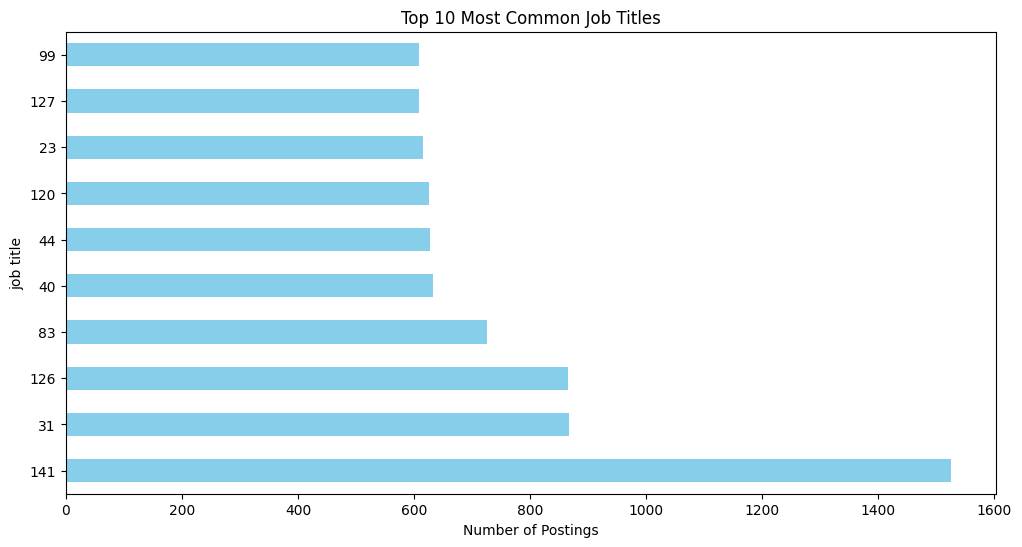

In [27]:
# Plot the top 10 most common job titles
plt.figure(figsize=(12, 6))
df['job title'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Postings')
plt.ylabel('job title')
plt.show()

#### Work Type Distribution - Pie Chart
The code calculates the distribution of job postings by work type using value_counts() on the 'work type' column.
A pie chart is generated to visually represent the percentage distribution of different work types, with the chart size adjusted for better visibility.
The pie chart is displayed with the title "Job Postings by Work Type" and no y-axis label for a cleaner presentation.

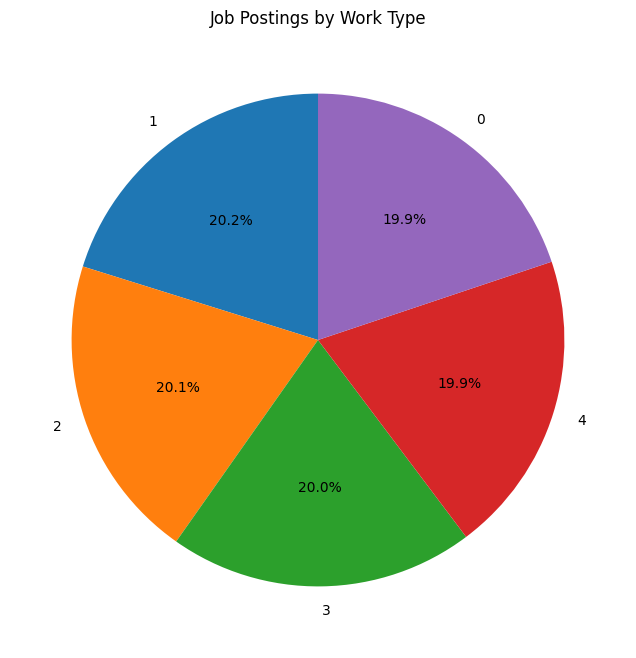

In [28]:
# Calculate work type distribution
work_type_distribution = df['work type'].value_counts()

# Plot pie chart with increased size
plt.figure(figsize=(8, 8))  # Adjust the size as needed
work_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Job Postings by Work Type')
plt.ylabel('')  # Removes the default y-axis label
plt.show()

#### Job Postings by Top 10 Countries
The code identifies the top 10 countries with the most job postings by using value_counts() on the 'country' column and selecting the top 10 entries.
A horizontal bar plot is generated to display the distribution of job postings across these top 10 countries, with the count of postings on the x-axis and countries on the y-axis.
The plot is titled "Distribution of Job Postings by Country (Top 10)", providing insights into which countries have the highest concentration of job opportunities.

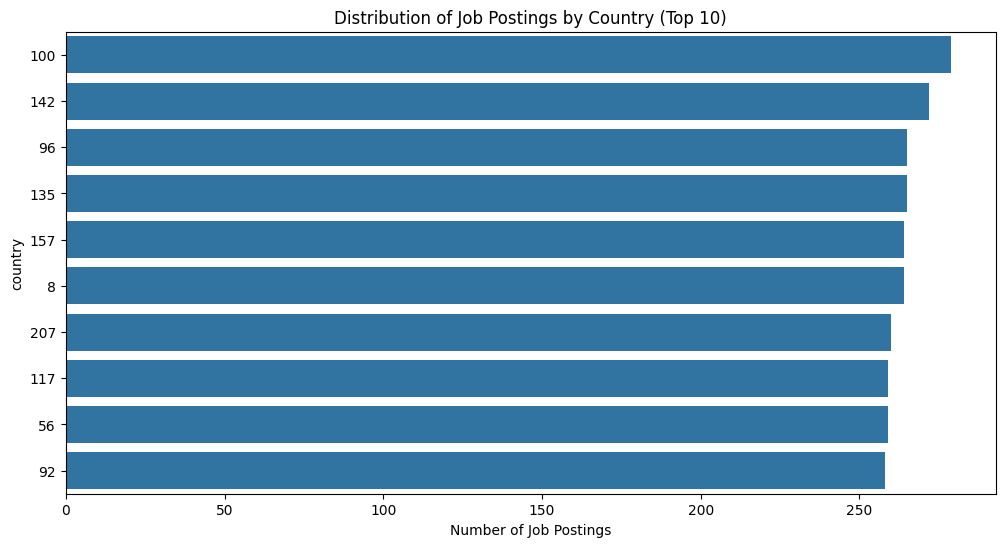

In [33]:
# Get the top 10 countries based on the number of job postings
top_10_countries = df['country'].value_counts().head(10).index

# Plot the distribution of job postings by the top 10 countries
plt.figure(figsize=(12, 6))
sns.countplot(y='country', data=df[df['country'].isin(top_10_countries)], order=top_10_countries)
plt.title('Distribution of Job Postings by Country (Top 10)')
plt.xlabel('Number of Job Postings')
plt.ylabel('country')
plt.show()

#### Top 10 Most In-Demand Jobs
The code calculates the top 10 most in-demand job titles by using value_counts() on the 'job title' column and selecting the top 10 job titles.
A bar plot is created to visualize the number of job openings for these top 10 job titles, with job titles on the x-axis and the number of openings on the y-axis.
The plot is titled "Top 10 Most In-Demand Jobs" to show the most 10 jobs that are of demand.

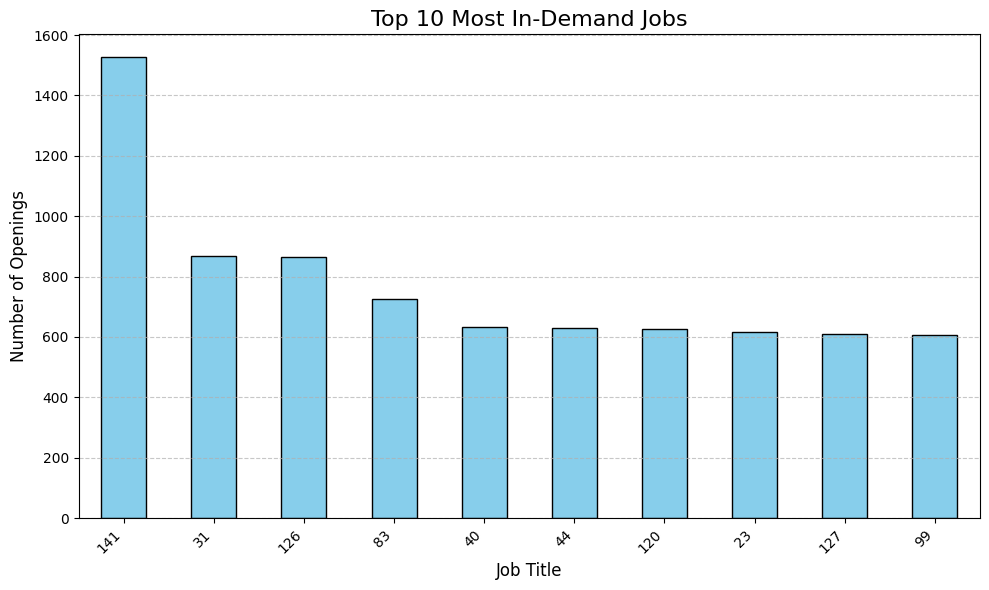

In [34]:
job_counts = df['job title'].value_counts().head(10)  # Top 10 most in-demand jobs

# Plot the data
plt.figure(figsize=(10, 6)
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most In-Demand Jobs', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Number of Openings', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Average Max Salary by Minimum Experience
The plot illustrates the relationship between the minimum years of experience required and the average maximum salary offered. Each point on the line plot represents an experience level and its corresponding average maximum salary. This visualization helps to identify trends in salary based on experience, highlighting how salary expectations increase with more years of experience.

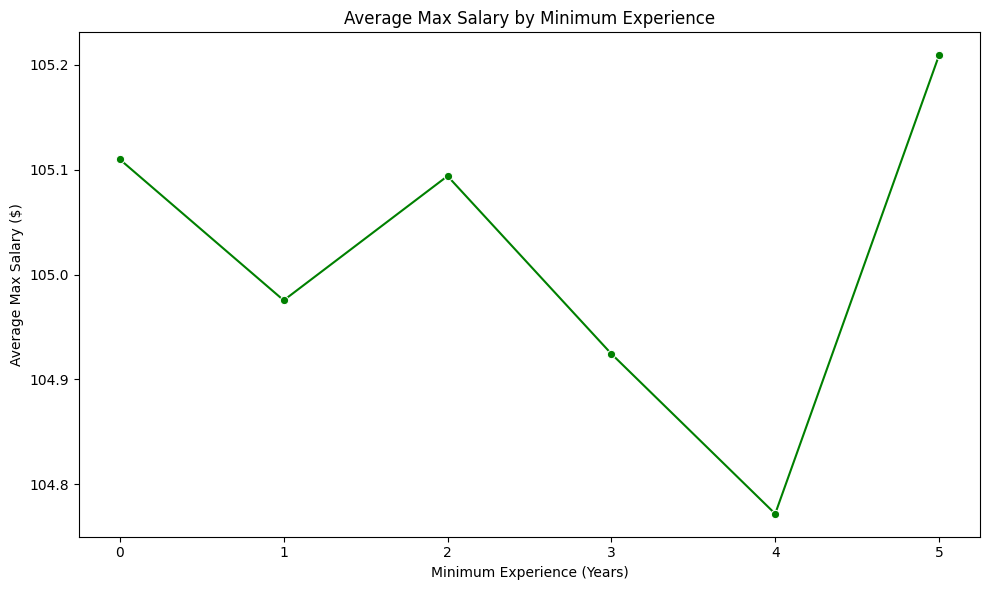

In [35]:
# Assuming that 'min_experience' and 'max_salary' columns are already available
# Group by minimum experience and calculate the average of max_salary for each experience level
experience_salary_comparison = df.groupby('min_experience')['max_salary'].mean()

# Plotting the comparison between minimum experience and average maximum salary
plt.figure(figsize=(10, 6))
sns.lineplot(x=experience_salary_comparison.index, y=experience_salary_comparison.values, marker='o', color='green')
plt.title('Average Max Salary by Minimum Experience')
plt.xlabel('Minimum Experience (Years)')
plt.ylabel('Average Max Salary ($)')
plt.tight_layout()
plt.show()

#### This plot displays the 5 most in-demand skills based on the job postings.
This plot helps identify the most sought-after skills in the job market, which can be valuable for both job seekers and recruiters.
The **skills** listed are those most commonly required in the job postings analyzed.

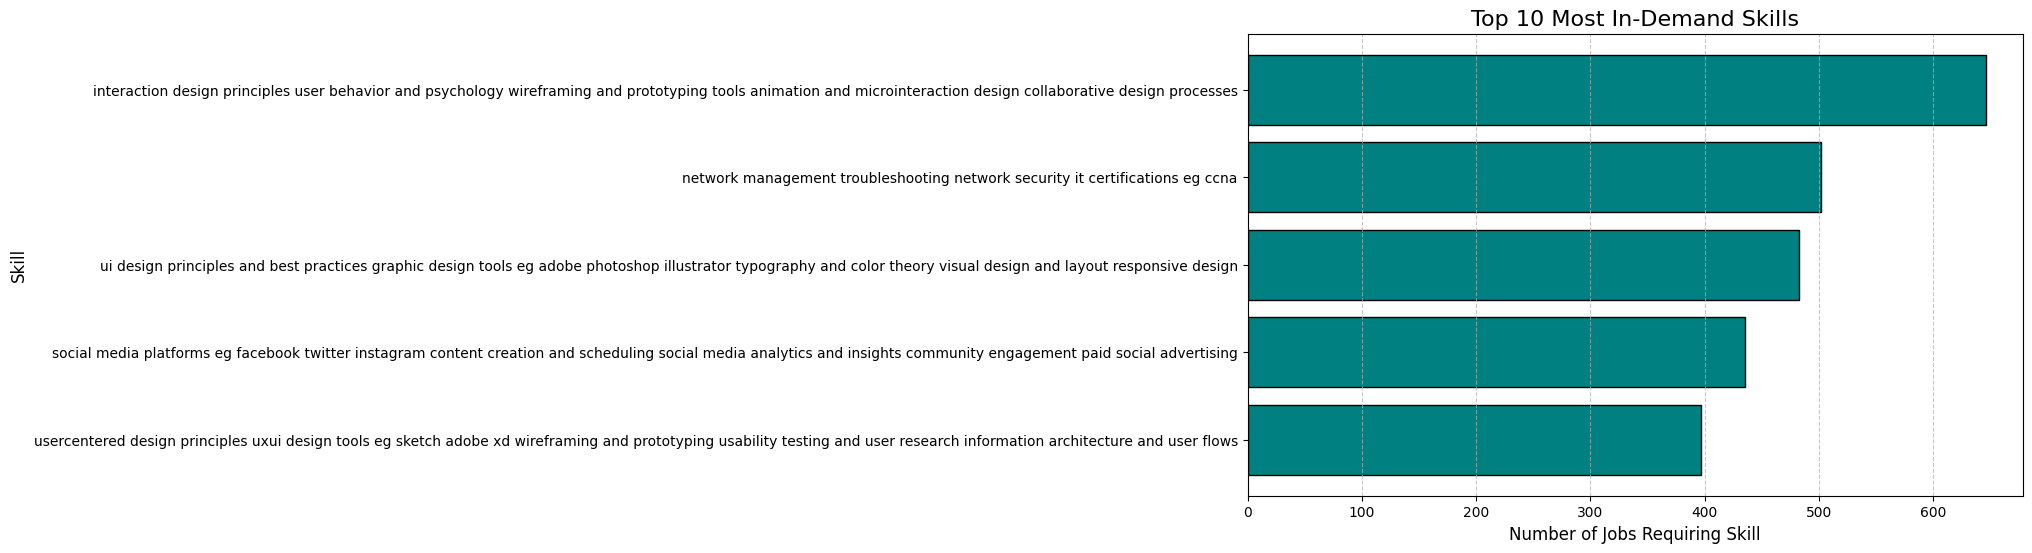

In [36]:
from collections import Counter
all_skills = []
df['skills'].dropna().apply(lambda x: all_skills.extend(x.split(',')))

# Count the frequency of each skill
skill_counts = Counter([skill.strip() for skill in all_skills])  # Strip extra spaces
most_in_demand_skills = skill_counts.most_common(5)  # Top 10 most in-demand skills

# Convert to a DataFrame for easier plotting
skills_df = pd.DataFrame(most_in_demand_skills, columns=['Skill', 'Count'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(skills_df['Skill'], skills_df['Count'], color='teal', edgecolor='black')
plt.title('Top 10 Most In-Demand Skills', fontsize=16)
plt.xlabel('Number of Jobs Requiring Skill', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have the most in-demand skill at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Histogram: Experience Requirements
This histogram shows the distribution of experience required for the different job postings. Provides insight into how common certain levels of experience are for different job roles.

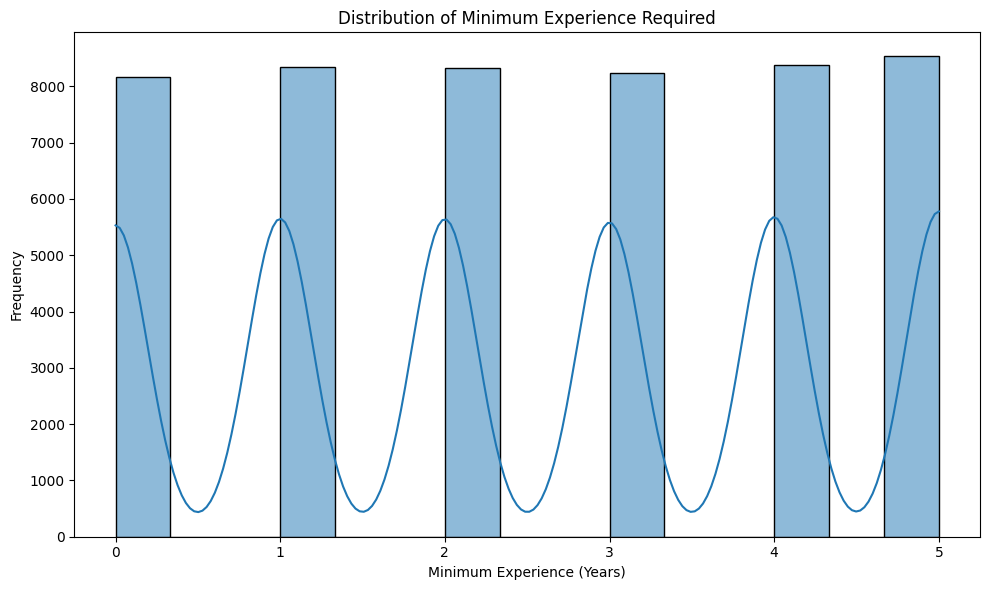

In [44]:
# plotting a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['min_experience'], kde=True, bins=15)
plt.title('Distribution of Minimum Experience Required')
plt.xlabel('Minimum Experience (Years)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Heatmap: Correlation of Numeric Features
The heatmap will show us the kind of relationship that exist among the minimum salary, maximum salary, and minimum experience. Helps identify relationships between variables (e.g., salary tends to increase with experience).


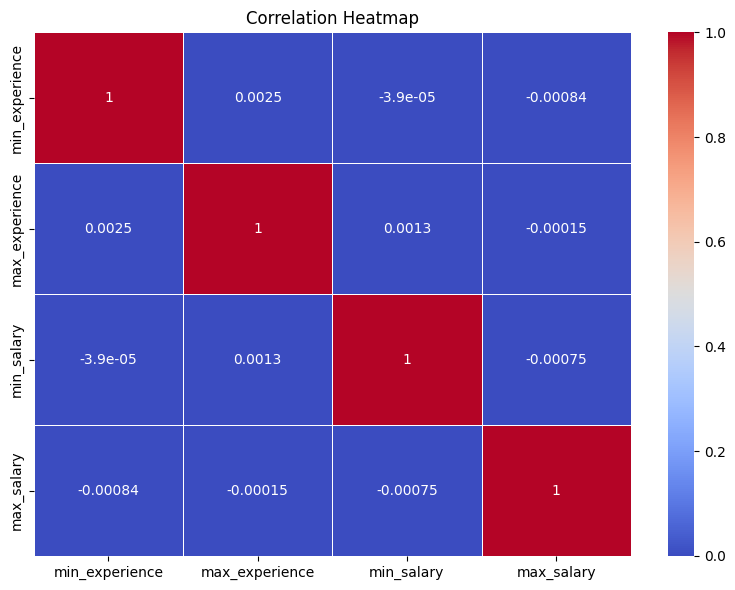

In [46]:
# Selecting numeric columns for correlation analysis
numeric_features = df[['min_experience', 'max_experience', 'min_salary', 'max_salary']]
corr_matrix = numeric_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

#### Salary Range by Qualifications
The box plot presents the distribution of maximum salaries across different qualification levels. This visualization provides insights into the salary range associated with various qualifications, highlighting the spread and central tendency of salaries for each qualification category.


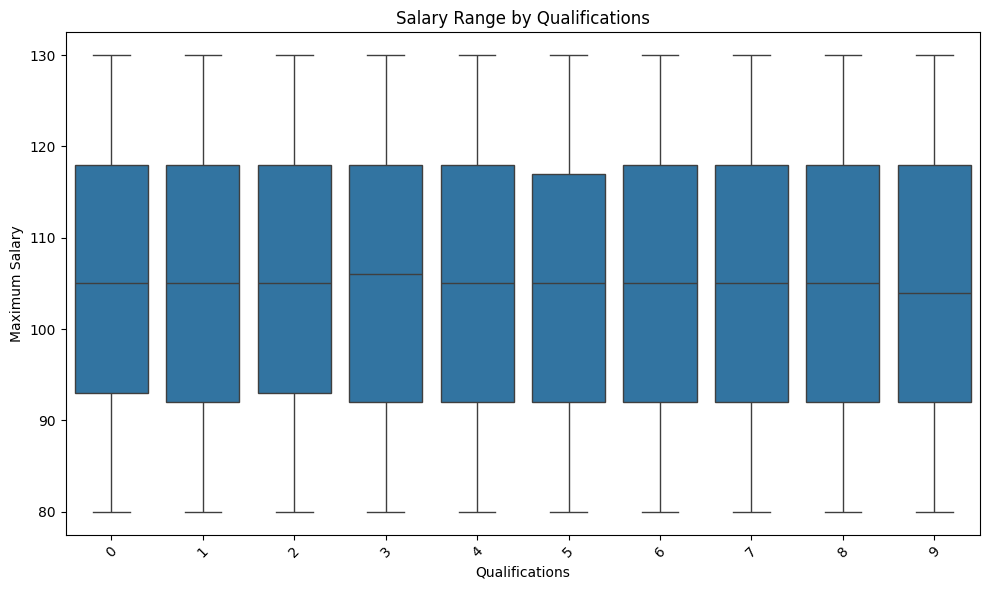

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='qualifications', y='max_salary', data=df)
plt.title('Salary Range by Qualifications')
plt.xlabel('Qualifications')
plt.ylabel('Maximum Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Front-End Overview

## Django Project Structure


The Django app, named jobs, is a web-based job recommendation system designed to provide personalized job suggestions based on a user's previous job details. It leverages natural language processing (NLP) to analyze input data and recommend relevant job postings sourced from LinkedIn.

Core Functionality
Input Submission: Users submit their previous job title, description, and salary through an interactive form.
NLP-Based Recommendation: The app processes the user input and compares it with a dataset of job postings using an NLP recommendation model.
Job Recommendations: The system outputs the top 5 job recommendations tailored to the user’s profile, displayed in a structured results table.
App Structure
Templates:

home.html: Landing page for user interaction and form submission.
job_detail.html: Displays details of a specific recommended job.
results_table.html: Shows a table of recommended jobs based on user input.
submit_job.html: Allows admin users to add new job postings.
success.html: Confirms successful job submission or form processing.
Views: Logic to handle user inputs, process job recommendations, and render templates dynamically.

Static Files: Includes a CSS file (styles.css) to style the templates.

System Workflow
User visits the homepage (home.html) and submits their previous job details via a form.
The app processes the input using an NLP model and fetches the top 5 relevant job postings.
Recommended jobs are displayed in a table (results_table.html), with links for further details (job_detail.html).
Admins can add job postings via submit_job.html, and successful submissions are confirmed on success.html.
Purpose
The app serves as a user-friendly tool for individuals seeking new job opportunities, simplifying the search process with advanced recommendations tailored to their unique profiles.

 The system's directory structure is shown below:

```plaintext
user/                             # Django project folder
├── jobs/                        # The main app folder
│   ├── migrations/              # Database migration files
│   │   ├── __init__.py
│   │   └── ... (migration files)
│   ├── static/                  # Static files for the app
│   │   └── jobs/                # Namespace for app-specific static files
│   │       └── styles.css       # CSS file for styling templates
│   ├── templates/               # Templates for the app
│   │   └── jobs/                # Namespace for app-specific templates
│   │       ├── home.html        # Landing page
│   │       ├── job_detail.html  # Detailed job view
│   │       ├── results_table.html # Table of job recommendations
│   │       ├── submit_job.html  # Form to submit a job
│   │       └── success.html     # Success page
│   ├── admin.py                 # Admin configuration
│   ├── apps.py                  # App configuration
│   ├── models.py                # Database models
│   ├── tests.py                 # Test cases
│   ├── urls.py                  # App-specific URLs
│   ├── views.py                 # Views handling logic
│   └── __init__.py              # Indicates this is a Python package
├── user/                        # Project configuration folder
│   ├── __init__.py
│   ├── asgi.py                  # ASGI configuration
│   ├── settings.py              # Global project settings
│   ├── urls.py                  # Project-wide URL configuration
│   ├── wsgi.py                  # WSGI configuration
│   └── ...
├── db.sqlite3                   # SQLite database (or other database)
├── manage.py                    # Django management script
└── README.md                    # Optional: Documentation for your project


Key Points in the Structure

1. jobs/static/jobs/
Houses static files (e.g., CSS, JavaScript, images) scoped to the jobs app.

2. jobs/templates/jobs/
Contains HTML templates for the jobs app.

3. urls.py
Both in the user project and jobs app for URL routing. The user/urls.py will include the jobs/urls.py.

4. views.py
Handles the logic to render templates and process data.

5. models.py
Manages the database schema and queries for jobs.

6. settings.py
Configures static files, database, and other global settings.

# Model Overview

In [8]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer


import numpy as np


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mulwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mulwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


### Global Variables & Functions

In [11]:
## initializing lemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
## preprocessing

def preprocess_text(text):
    '''
    This is a function that takes in a text string as an argument.
    Performs lemmatization operations and returns a processed string.
    '''
    tokens = word_tokenize(text.lower())
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)

In [15]:
## mapping function

def mappingfunction(dataframe, column, function):
    '''
    This is a function that maps a function operation to a column of dataframe.

    Args:
        - dataframe: A dataframe with more than one column
        - column; a string representing a specific column of the mentioned dataframe.
        - function: a function that returns a non-zero value that will be mapped onto the column.
    
    Returns:
        - The dataframe with a new column created where the function's operations have been applied.
    '''
    dataframe[f'cleaned_{column}'] = dataframe[f'{column}'].apply(function)
    return dataframe

In [17]:
input_vector = []
reference_vector = []

def VectorProcessing(input_dataframe, column_x, reference_dataframe, column_y):
    '''
    This is a function that creates an n-dimensional vector space and places text tokens in that vector space.\
    The function then returns those tokens as vectors in said vectorspace.

    Args:
        - input_dataframe: This is a dataframe containing data that the user would like to cross-reference.
        - column_x: This is a string representing the name of the column in the aforementioned dataframe.
        - reference_dataframe: This is a dataframe containing data against which we would like to perform X-referencing.
        - column_y: This is a string representing the name of the column in the reference dataframe.
    
    Returns:
        - NULL
        - The resulting vectors are saved to global variables declared out of the scope of the function.
    '''
    all_text = pd.concat([input_dataframe[f'{column_x}'], reference_dataframe[f'{column_y}']])
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(all_text)

    input_vector.clear()
    reference_vector.clear()

    input_vector.append(tfidf_matrix[:len(input_dataframe)])
    reference_vector.append(tfidf_matrix[len(input_dataframe):])
    return


In [18]:
from scipy.spatial.distance import cdist

def hammingdistances(vector1, vector2):
    '''
        This is a function to find the L1 Normal distance between two vectors in a vectorspace.(i.e. The hamming/manhattan distance)

        Args:
            - vector1: This is the first token vector.
            - vector2: Second token vector to check against the first one. 
        
        Returns:
            - a 2D-numpy array of all the distances between the vectors.
    '''
    distances = cdist(vector1.toarray(),vector2.toarray(),metric='cityblock')
    return distances

In [20]:
def get_top_recommendations(input_dataframe, index,  reference_dataframe, ref_id, distances, num_recommendations=5):
    '''
    This is a function that takes in the reference dataframe, the input dataframe, the hamming distances, and generates\
    a collection of the top recommendations where the smaller the hamming distance is, the higher the recommendation.

    Args: 
        - input_dataframe: The dataframe containing the data that the user would like to cross-reference.
        - index: The name of the id column from the input dataframe.
        - reference_dataframe: The dataframe containing the data against which we would like to X-reference.
        - ref_id: The name of the id column from the reference dataframe.
        - distance: A numpy array representing the manhattan distances between the token vectors.
        - num_recommendations: The number of recommendations the user would like to recieve. Default is 5.

    Returns:
        - A python dictionary with the top n number of recommendations from the reference dataframe.
    '''
    recommendations = {}

    for i, applicant_id in enumerate(input_dataframe[f'{index}']):
        top_job_indices = np.argsort(distances[i])[:num_recommendations]
        top_job_ids = reference_dataframe[f'{ref_id}'].iloc[top_job_indices].values
        recommendations[applicant_id] = top_job_ids

    return recommendations

In [21]:
def create_recommendations_dataframe(recommendations):
    '''
    This is a function that takes in a python dictionary and returns a pandas dictionary of the data in the dictionary.

    Args:
        - recommendations: A python dictionary
    
    Returns:
        - A pandas dataframe
    '''
    recommendations_list = [
        {'Applicant ID': applicant_id, 'Recommended Job IDs': list(recommended_jobs)}
        for applicant_id, recommended_jobs in recommendations.items()
    ]
    return pd.DataFrame(recommendations_list)

In [22]:
def filter_jobs_for_applicant(data_df, recommendations_df, applicant_id):
    '''
    This is a function that will filter applicant data based on their ID and display their top recommendations.

    Args:
        - data_df: The reference dataframe containing all data against which to cross-reference.
        - recommendations_df: The dataframe containing all the recommendations for the users.
        - applicant_id: The unique identifier for a specific user.
    
    Returns:
        - A dataframe containing all the recommendations for that particular user.

    '''
    recommended_jobs = recommendations_df.loc[recommendations_df['Applicant ID'] == applicant_id, 'Recommended Job IDs']
    if not recommended_jobs.empty:
        job_ids = recommended_jobs.iloc[0]
        return data_df[data_df['Job Id'].isin(job_ids)]
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no recommendations found

In [23]:
def processPipeline(input_dict, index, input_column, data, ref_id, data_field, num_recs):
    '''
    This is a function that represents the pipeline for all necessary steps to generate recommendations.

    Returns:
        - A dataframe with all the recommendations for a given user.
    '''
    input = pd.DataFrame(input_dict)
    input_df = mappingfunction(input, f'{input_column}', preprocess_text)

    reference_df = mappingfunction(data, f'{data_field}', preprocess_text)

    vectors = VectorProcessing(input_df, f'cleaned_{input_column}', reference_df, f'cleaned_{data_field}')

    hammings = hammingdistances(input_vector[0], reference_vector[0])

    toprecs = get_top_recommendations(input_df, index, reference_df, ref_id, hammings, num_recs)

    recs_df = create_recommendations_dataframe(toprecs)

    return recs_df

### Demo

In [24]:
## synthetic input data
applicants = [
    {"id": 1, "experience": "Data Scientist with 5 years experience in python, machine learning and NLP"},
    {"id": 2, "experience": "Software engineer skilled in Java, web development, and cloud infrastructure"}
]

df_applicants = pd.DataFrame(applicants)

In [25]:
## Show all recommendations for given applicants (Runtime: < 20 seconds)
test1 = processPipeline(applicants, 'id', 'experience', df, 'Job Id', 'skills', 5)
test1

,Applicant ID,Recommended Job IDs
0,1,"[594408234112498, 2225273450778765, 2385029405..."
1,2,"[2317317275617221, 2405882023007651, 237385764..."


In [27]:
## Showing all recommended jobs for user 1
user1 = filter_jobs_for_applicant(df, test1, 1)

user1

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,cleaned_skills
2539,2214808679736901,4 to 13 Years,M.Tech,$62K-$89K,Windhoek,Namibia,-22.9576,18.4904,Contract,127027,...,Data Scientist,Machine Learning Engineer,Glassdoor,Machine Learning Engineers develop machine lea...,"{'Childcare Assistance, Paid Time Off (PTO), R...",Machine learning algorithms Python programming...,Develop machine learning models and algorithms...,Massachusetts Mutual Life Insurance,"{""Sector"":""Insurance"",""Industry"":""Insurance: L...",machine learning algorithm python programming ...
7122,2385029405613656,1 to 9 Years,B.Tech,$59K-$93K,Bishkek,Kyrgyz Republic,41.2044,74.7661,Full-Time,26638,...,Data Scientist,Machine Learning Engineer,Jobs2Careers,Machine Learning Engineers develop machine lea...,"{'Childcare Assistance, Paid Time Off (PTO), R...",Machine learning algorithms Python programming...,Develop machine learning models and algorithms...,NextEra Energy,"{""Sector"":""Energy"",""Industry"":""Utilities: Gas ...",machine learning algorithm python programming ...
8210,1598912775601511,5 to 13 Years,PhD,$57K-$113K,Cockburn Town,Turks and Caicos Islands,21.6940,-71.7979,Intern,25104,...,Data Scientist,Machine Learning Engineer,Jobs2Careers,Machine Learning Engineers develop machine lea...,"{'Legal Assistance, Bonuses and Incentive Prog...",Machine learning algorithms Python programming...,Develop machine learning models and algorithms...,Delek US Holdings,"{""Sector"":""Energy"",""Industry"":""Petroleum Refin...",machine learning algorithm python programming ...
36326,2225273450778765,3 to 9 Years,B.Com,$61K-$125K,Luxembourg,Luxembourg,49.8153,6.1296,Part-Time,119294,...,Data Scientist,Machine Learning Engineer,FlexJobs,Machine Learning Engineers develop machine lea...,"{'Life and Disability Insurance, Stock Options...",Machine learning algorithms Python programming...,Develop machine learning models and algorithms...,Beacon Roofing Supply,"{""Sector"":""Building Materials & Equipment"",""In...",machine learning algorithm python programming ...
47031,594408234112498,2 to 13 Years,BBA,$56K-$94K,Brasilia,Brazil,-14.2350,-51.9253,Part-Time,123432,...,Data Scientist,Machine Learning Engineer,Stack Overflow Jobs,Machine Learning Engineers develop machine lea...,"{'Casual Dress Code, Social and Recreational A...",Machine learning algorithms Python programming...,Develop machine learning models and algorithms...,Oneok,"{""Sector"":""Energy"",""Industry"":""Pipelines"",""Cit...",machine learning algorithm python programming ...
